### Sales Revenue Forecasting for an Online Retailer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('online_retail_II.xlsx')

In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [9]:
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [11]:
len(df)

525461

In [13]:
df['Total Price'] = df['Quantity'] * df['Price']

In [15]:
df.corr(numeric_only=True)['Total Price']

Quantity       0.156283
Price          0.452592
Customer ID   -0.009475
Total Price    1.000000
Name: Total Price, dtype: float64

In [454]:
df['Day_Name'] = df['InvoiceDate'].dt.day_name()
df['Day'] = df['InvoiceDate'].dt.day
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Season'] = df['Month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                3: 'Spring', 4: 'Spring', 5: 'Spring',
                                6: 'Summer', 7: 'Summer', 8: 'Summer',
                                9: 'Autumn', 10: 'Autumn', 11: 'Autumn'})

In [18]:
df.drop(['Customer ID','InvoiceDate','Year','Month','Day'],axis=1).describe()

,Quantity,Price,Total Price
count,525461.000000,525461.000000,525461.000000
mean,10.337667,4.688834,18.154506
std,107.424110,146.126914,160.333083
min,-9600.000000,-53594.360000,-53594.360000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.100000,9.950000
75%,10.000000,4.210000,17.700000
max,19152.000000,25111.090000,25111.090000


###### We drop the Customer ID,'InvoiceDate','Year','Month','Day' columns because it doesn't make sense to have a mean say for Customer ID. We can also see that Quantity and and price have negative minimum values, but we will sort that

In [546]:
# All cancelled invoices were cancelled had the first letter start with 'C'
canceled_invoices = df[df['Invoice'].str.contains('C', na=False)]
canceled_invoices_index = canceled_invoices.index.tolist()


AttributeError: Can only use .str accessor with string values!

In [20]:
df=df.drop(canceled_invoices_index)

In [25]:
df['Day_Name'].value_counts()

Day_Name
Thursday     96936
Monday       92491
Tuesday      92365
Wednesday    88808
Sunday       74242
Friday       70011
Saturday       402
Name: count, dtype: int64

###### Here we can already see based on customers behaviour, most of them tend to go for shopping on thursday and least on saturday

In [31]:
df.corr(numeric_only=True)

,Quantity,Price,Customer ID,Total Price,Day,Month,Year
Quantity,1.000000,-0.001772,-0.014947,0.171255,0.001916,-0.008494,0.003607
Price,-0.001772,1.000000,-0.005869,0.891726,-0.001326,-0.000492,-0.000699
Customer ID,-0.014947,-0.005869,1.000000,-0.015804,-0.004528,0.036364,-0.018912
Total Price,0.171255,0.891726,-0.015804,1.000000,-0.002421,-0.001365,0.002271
Day,0.001916,-0.001326,-0.004528,-0.002421,1.000000,-0.164970,0.176492
Month,-0.008494,-0.000492,0.036364,-0.001365,-0.164970,1.000000,-0.393983
Year,0.003607,-0.000699,-0.018912,0.002271,0.176492,-0.393983,1.000000


###### We can see that quantity will likely impact the total price 

In [33]:
#df['Quantity']=-1*df['Quantity']<1 
df['Quantity']=df['Quantity'].abs()

In [ ]:
###### Here we assume that the negative quantity was a human input error and maybe he/she was trying to put a dash before the quatity. Therefore we change them to be absolute values

In [35]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() /len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan
    

In [37]:
percent_nun = percent_missing(df)

<Axes: xlabel='None', ylabel='None'>

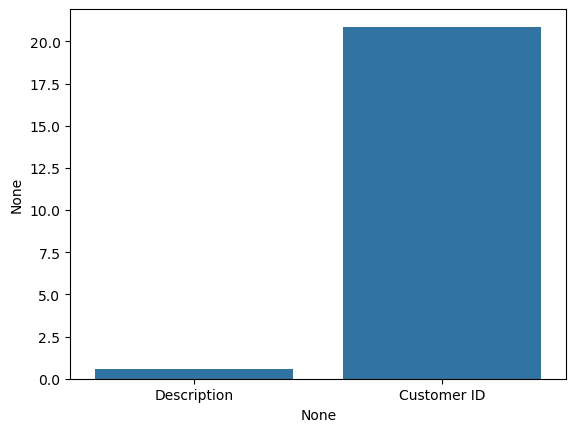

In [39]:
sns.barplot(x=percent_nun.index,y=percent_nun)

In [40]:
neg_price_index = df[df['Price']<0].index.values
neg_price_index 

array([179403, 276274, 403472])

In [41]:
df = df.drop(neg_price_index,axis=0)

In [45]:
df.drop(['Customer ID','InvoiceDate','Year','Month','Day'],axis=1).describe()

,Quantity,Price,Total Price
count,515252.00000,515252.000000,515252.000000
mean,12.37785,4.221416,20.001654
std,104.19530,63.435424,90.608856
min,1.00000,0.000000,-0.000000
25%,1.00000,1.250000,3.900000
50%,3.00000,2.100000,10.080000
75%,12.00000,4.210000,17.700000
max,19152.00000,25111.090000,25111.090000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515252 entries, 0 to 525460
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      515252 non-null  object        
 1   StockCode    515252 non-null  object        
 2   Description  512324 non-null  object        
 3   Quantity     515252 non-null  int64         
 4   InvoiceDate  515252 non-null  datetime64[ns]
 5   Price        515252 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      515252 non-null  object        
 8   Total Price  515252 non-null  float64       
 9   Day_Name     515252 non-null  object        
 10  Day          515252 non-null  int32         
 11  Month        515252 non-null  int32         
 12  Year         515252 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1), object(5)
memory usage: 49.1+ MB


In [49]:
100*(len(df[(df['Description'].isna()) & (df['Price']==0)& (df['Customer ID'].isna())])/len(df))

0.5682656253638997

In [51]:
null_info = df[(df['Description'].isna()) & (df['Price']==0)& (df['Customer ID'].isna())].index.tolist()
#null_info

In [53]:
df = df.drop(null_info)

In [55]:
zero_prices = df[df['Price']==0].index.values

In [57]:
df = df.drop(zero_prices)

In [61]:
#df[(df['Customer ID'].isna()) &(df['Invoice'].duplicated())]
result = df[df['Invoice'].duplicated(keep=False) & df['Customer ID'].isna()]

In [63]:
len(result)

103510

### Which products bring the most revenue?

In [76]:
grouped.sort_values('Total Price',ascending=False)

,Quantity,Total Price,Transaction Count,Avg Unit Price
StockCode,,,,
M,2826,262606.010,555,92.924986
22423,13698,170078.510,2044,12.416302
85123A,58487,158590.870,3421,2.711558
DOT,730,116408.710,730,159.463986
85099B,49875,89114.780,2012,1.786763
...,...,...,...,...
79151B,1,0.420,1,0.420000
84206C,2,0.380,2,0.190000
35930,1,0.380,1,0.380000


In [78]:
print('Product M brings the largest revenue. The total price generated was 262606')

Product M brings the largest revenue. The total price generated was 262606


### Customer Behavior Metrics:

Recency: Days since last purchase

Frequency: Number of purchases

Monetary: Total spend (CLTV-style)

AverageBasketValue = TotalSpend / NumberOfOrders



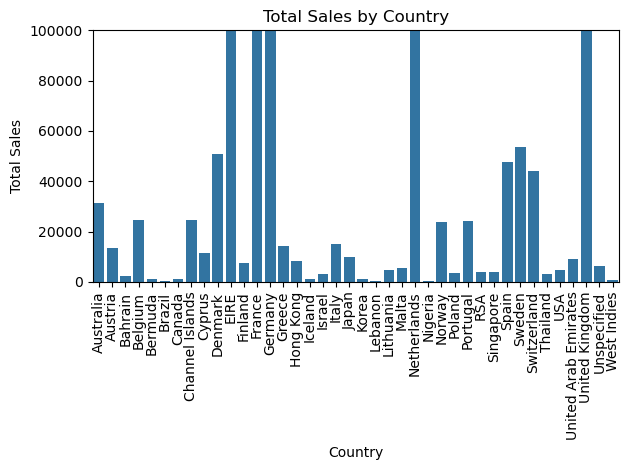

In [174]:
sns.barplot(x=country_sales.index,y=country_sales.values)
plt.xticks(rotation=90)
plt.ylim((0,100000))
plt.ylabel('Total Sales')
plt.title('Total Sales by Country')
plt.tight_layout()
plt.show()

In [ ]:
sns.displot(df['Total Price'])

In [140]:
sample = df.sample(frac=0.05,random_state=101)

<Axes: xlabel='Day_Name', ylabel='Total Price'>

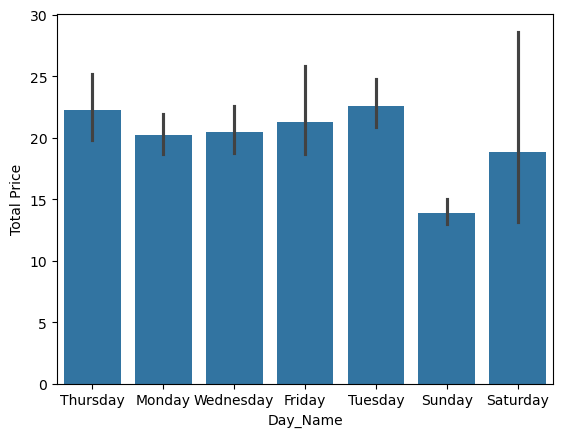

In [170]:
sns.barplot(data=sample,x='Day_Name',y='Total Price')

In [224]:
top_ten_largest_sale = df.groupby('StockCode')['Total Price'].sum().nlargest(10)

In [226]:
top_ten_largest_sale = pd.DataFrame(top_ten_largest_sale)
top_ten_largest_sale

,Total Price
StockCode,
M,262606.01
22423,170078.51
85123A,158590.87
DOT,116408.71
85099B,89114.78
84879,73092.99
22086,58189.25
47566,49682.72
POST,49477.54


### What are the most purchased products

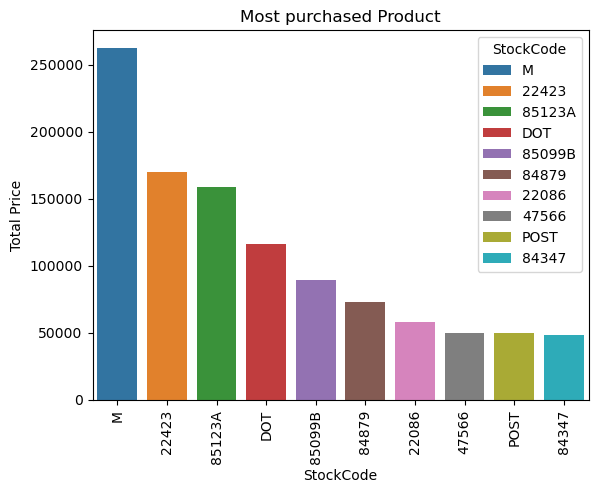

In [240]:
plt.title('Most purchased Product')
sns.barplot(x='StockCode', y='Total Price',data=top_ten_largest_sale,hue='StockCode')
plt.xticks(rotation=90)
plt.show()


In [247]:
top5_sales_by_country = df.groupby('Country')['Total Price'].sum().nlargest(5)
top5_sales_by_country

Country
United Kingdom    8845755.693
EIRE               380977.820
Netherlands        268786.000
Germany            202395.321
France             147211.490
Name: Total Price, dtype: float64

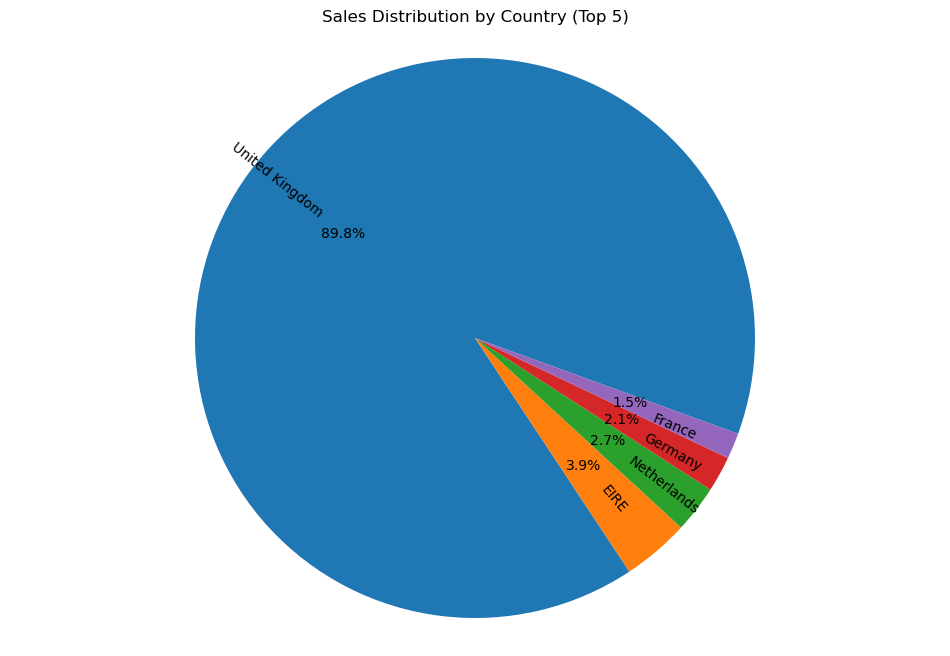

In [416]:
plt.figure(figsize=(12,8))
plt.pie(top5_sales_by_country, labels=top5_sales_by_country.index, autopct='%1.1f%%', startangle=340,labeldistance=0.68,rotatelabels=True)
plt.title('Sales Distribution by Country (Top 5)')
plt.axis('equal')  # Equal aspect ratio makes it a circle
plt.show()

<Axes: xlabel='Country'>

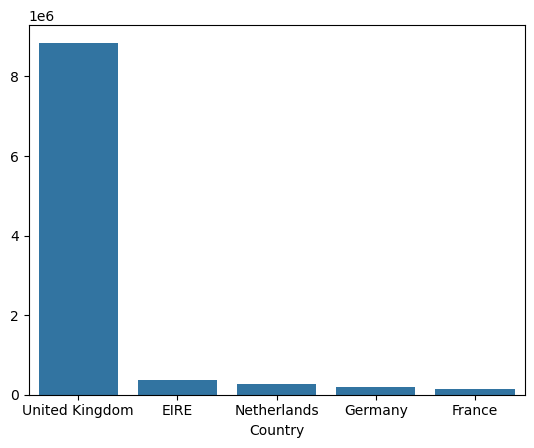

In [259]:
sns.barplot(x=top5_sales_by_country.index, y=top5_sales_by_country.values)

### Which hour of the day, day of the week is when most transactions happen?

In [282]:
df['Hour'] = df['InvoiceDate'].dt.hour

In [312]:
sales_per_hour = df.groupby('Hour')['Total Price'].sum()
sales_per_hour 
#=  pd.DataFrame(sales_per_hour)

Hour
7       45173.360
8      248582.160
9      811927.190
10    1182529.102
11    1344567.013
12    1465961.471
13    1336833.954
14    1203783.100
15    1125232.302
16     887118.761
17     417608.631
18     137325.940
19      78326.000
20      20923.040
Name: Total Price, dtype: float64

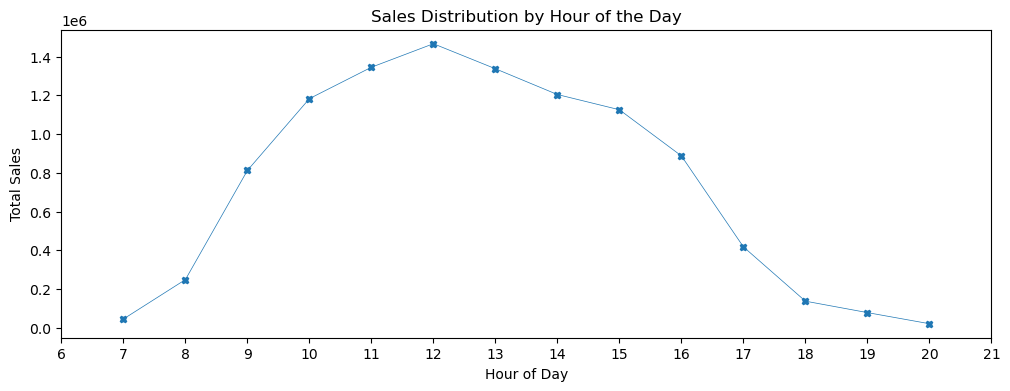

In [438]:
plt.figure(figsize=(12, 4))
plt.plot(sales_per_hour.index, sales_per_hour.values, marker='X',ms=5,lw=0.5)
plt.title('Sales Distribution by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.xticks(range(6, 22))  # Ensure all 24 hours are shown
plt.show()

##### Sales started at aroud 7am, the sales increase gradually upto its peak at noon then gradually droped and finally ended at around 8pm

In [352]:
sales_per_week = df.groupby('Day_Name')['Total Price'].sum()
# Define correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_per_week.index = pd.Categorical(sales_per_week.index, categories=day_order, ordered=True)
sales_per_week = sales_per_week.sort_index()


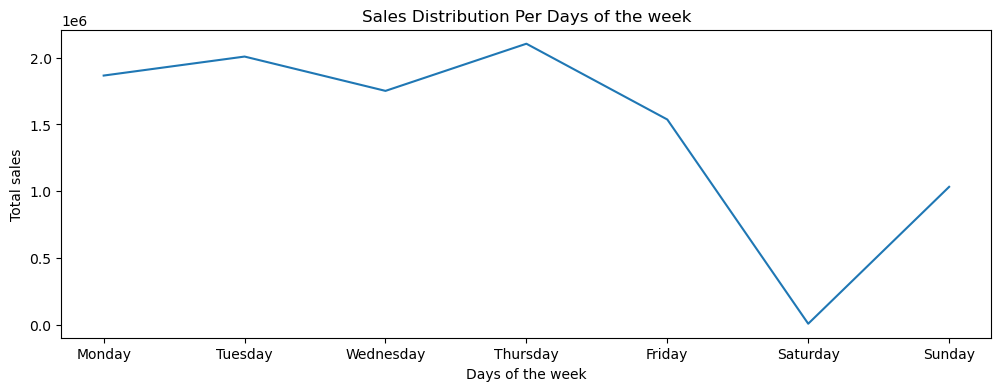

In [360]:
plt.figure(figsize=(12,4))
plt.title('Sales Distribution Per Days of the week')
plt.plot(sales_per_week.index,sales_per_week.values)
plt.ylabel('Total sales')
plt.xlabel('Days of the week')
plt.show()

##### We can see that from monday to wednesday the sales were flactuating but spiked on thursday. It droped on friday then sunk drastically on saturday. On sunday it started rising again

In [364]:
sales_per_mon = df.groupby('Month')['Total Price'].sum()
sales_per_mon

Month
1      652708.502
2      553339.736
3      833570.131
4      681528.992
5      659858.860
6      752270.140
7      650712.940
8      697274.910
9      924333.011
10    1165483.910
11    1470272.482
12    1264538.410
Name: Total Price, dtype: float64

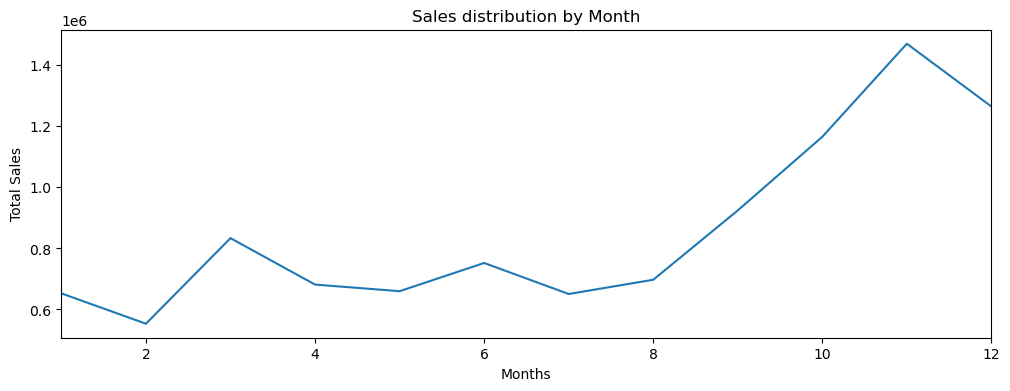

In [440]:
plt.figure(figsize=(12,4))
plt.title('Sales distribution by Month')
plt.plot(sales_per_mon.index,sales_per_mon.values)
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.show()

##### From january the sales as it entered feb then flactuated from March to august where it started rising till its peak on the month of november. As it moved towards december it appeared to be dropping but we cant conclude at that because of the limitation of the data's date

In [442]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price,Day_Name,Day,Month,Year,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,Tuesday,1,12,2009,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,Tuesday,1,12,2009,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,Tuesday,1,12,2009,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,Tuesday,1,12,2009,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,Tuesday,1,12,2009,7


In [444]:
df.corr(numeric_only=True)

,Quantity,Price,Customer ID,Total Price,Day,Month,Year,Hour
Quantity,1.000000,-0.005128,-0.014973,0.325236,0.000566,-0.011756,0.005960,-0.021429
Price,-0.005128,1.000000,-0.005874,0.699023,0.001062,-0.002041,-0.000099,0.003476
Customer ID,-0.014973,-0.005874,1.000000,-0.015820,-0.004570,0.036357,-0.018885,0.059639
Total Price,0.325236,0.699023,-0.015820,1.000000,-0.001483,-0.003265,0.004593,-0.028164
Day,0.000566,0.001062,-0.004570,-0.001483,1.000000,-0.166257,0.178401,-0.013839
Month,-0.011756,-0.002041,0.036357,-0.003265,-0.166257,1.000000,-0.393842,0.038627
Year,0.005960,-0.000099,-0.018885,0.004593,0.178401,-0.393842,1.000000,-0.060904
Hour,-0.021429,0.003476,0.059639,-0.028164,-0.013839,0.038627,-0.060904,1.000000


In [452]:
df.corr(numeric_only=True)['Total Price'].sort_values()

Hour          -0.028164
Customer ID   -0.015820
Month         -0.003265
Day           -0.001483
Year           0.004593
Quantity       0.325236
Price          0.699023
Total Price    1.000000
Name: Total Price, dtype: float64

In [458]:
df = df.dropna(subset=['Customer ID'])

In [460]:
len(df)

407664

In [464]:
customer_df = df.groupby('Customer ID').agg({'Invoice':'nunique', 'Quantity': 'sum','Total Price': 'sum','InvoiceDate': ['min', 'max']})

In [470]:
customer_df.columns = ['NumOrders', 'TotalQuantity', 'TotalRevenue', 'FirstPurchase', 'LastPurchase']

In [474]:
# Recency feature (days since last purchase)
max_date = df['InvoiceDate'].max()
customer_df['Recency'] = (max_date - customer_df['LastPurchase']).dt.days



In [476]:
# Average basket size
customer_df['AvgBasket'] = customer_df['TotalRevenue'] / customer_df['NumOrders']

In [478]:

customer_df


,NumOrders,TotalQuantity,TotalRevenue,FirstPurchase,LastPurchase,Recency,AvgBasket
Customer ID,,,,,,,
12346.0,11,70,372.86,2009-12-14 08:34:00,2010-06-28 13:53:00,164,33.896364
12347.0,2,828,1323.32,2010-10-31 14:20:00,2010-12-07 14:57:00,2,661.660000
12348.0,1,373,222.16,2010-09-27 14:59:00,2010-09-27 14:59:00,73,222.160000
12349.0,3,993,2671.14,2010-04-29 13:20:00,2010-10-28 08:23:00,42,890.380000
12351.0,1,261,300.93,2010-11-29 15:23:00,2010-11-29 15:23:00,10,300.930000
...,...,...,...,...,...,...,...
18283.0,6,336,641.77,2010-02-19 17:16:00,2010-11-22 15:30:00,17,106.961667
18284.0,1,494,461.68,2010-10-04 11:33:00,2010-10-04 11:33:00,66,461.680000
18285.0,1,145,427.00,2010-02-17 10:24:00,2010-02-17 10:24:00,295,427.000000


In [480]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [494]:
X= customer_df.drop(['FirstPurchase','LastPurchase','TotalRevenue'],axis=1)

In [496]:
y=customer_df['TotalRevenue']

In [498]:
model = LinearRegression()

In [500]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [502]:
model.fit(X_train,y_train)

LinearRegression()

In [504]:
y_pred = model.predict(X_test)

In [508]:
MSE = mean_squared_error(y_test,y_pred)
np.sqrt(MSE)

np.float64(3084.4217107373574)

In [510]:
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.8345595725331347
RMSE: 3084.4217107373574


In [512]:
from sklearn.linear_model import ElasticNet

In [514]:
elastic_model = ElasticNet()

In [516]:
from sklearn.model_selection import GridSearchCV

In [520]:
param_grid = {'alpha':[0.1,.3,.5,.7,.8,.1],'l1_ratio':[0.01,0.1,1,10,100]}

In [522]:
gridModel = GridSearchCV(elastic_model,param_grid=param_grid,scoring='neg_mean_squared_error',verbose=2,cv=5)

In [524]:
gridModel.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ...........................alpha=0.1, l1_ratio=0.01; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.01; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.01; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.01; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.01; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.

C:\Users\Ryan\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ryan\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ryan\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\Ryan\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.3, 0.5, 0.7, 0.8, 0.1],
                         'l1_ratio': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [526]:
gridModel.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [530]:
y_new_test = gridModel.predict(X_test)

In [534]:
RMSE = np.sqrt(mean_squared_error(y_test,y_new_test))

In [536]:
RMSE

np.float64(3084.417465449113)

In [556]:
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.8345595725331347


#### Our model scored 83% which is wonderful